## Question 1

### Part a)

(1)$$g(z)+g(-z) = \frac{1}{1+e^{-z}} + \frac{1}{1+e^{z}} = \frac{1+e^{z}+1+e^{-z}}{(1+e^{-z})(1+e^{z})} = \frac{1}{1} = 1$$ 
(2)
$$g'(z) = \frac{d}{dz}(1+e^{-z})^{-1} = -(1+e^{-z})^{-2} ⋅ e^{-z} \cdot (-1) = \frac{e^{-z}}{(1+e^{-z})^{2}} $$ 
$$g'(-z) = \frac{e^{z}}{(1+e^{z})^{2}} = \frac{e^{z} (\frac{1}{e^{z}})^{2}}{(1+e^{z})^{2}(\frac{1}{e^{z}})^{2}} = \frac{e^{-z}}{(1+e^{-z})^{2}}  = g(z) $$
(3) 
$$g'(-z) = \frac{e^{-z}}{(1+e^{-z})^{2}} = \frac{e^{-z}}{1+ 2e^{-z}+ e^{-2z}} = \frac{1}{(1+e^{z})(1+e^{-z})} = g(z)g(-z)$$
As $$ g(z)g(-z) = g(z)(1-g(z))$$
Therefore, 
$$ g'(z) = g(z)(1-g(z)) = g(z)g(-z) $$



## Part b)
$$g(z) = \frac{1}{1+e^{-z/T}}$$


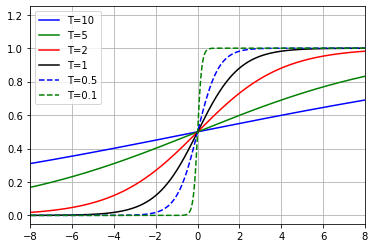

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def g(z,T):
  return 1/(1+np.exp(-z/T))

x = np.linspace(-10,10,1000)
plt.plot(x,g(x,10),label="T=10",color='blue')
plt.plot(x,g(x,5),label="T=5",color='green')
plt.plot(x,g(x,2),label="T=2",color='red')
plt.plot(x,g(x,1),label="T=1",color='black')
plt.plot(x,g(x,0.5),"b--",label="T=0.5")
plt.plot(x,g(x,0.1),"g--",label="T=0.1")


plt.ylim(-0.05,1.25)
plt.xlim(-8,8)
plt.grid('True')
plt.legend()
plt.show()

By taking a look of the shape of g(z) here, when T → 0, the shape of g(z) would look like a **unit step function**. 

## Question 2 - Logistic Regression 

In [1]:
import numpy as np
import pandas as pd
import os

In [4]:
# Read the csv to pandas dataframe

from pandas import DataFrame

background_df = pd.read_csv(os.path.join(os.getcwd(),"background_sample.csv"), sep=",")
Signal_df = pd.read_csv(os.path.join(os.getcwd(),"signal_sample.csv"), sep=",")

#Set background to be 0, Signal to be 1. Add the 2 dataframe together
background_df["Signal"] = 0 
Signal_df["Signal"] = 1 
frames = [background_df,Signal_df]
df = pd.concat(frames,ignore_index=True)
#print(df.head(510))

In [5]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
  
def  computeCost(theta,X,y):
    m = float(len(y))
    predictions = sigmoid(X.dot(theta))
    cost = -(1/m) * (y.T.dot(np.log(predictions))+(1-y).T.dot(np.log(1-predictions)))
    return cost

In [6]:
def gradient_descent(X,y,theta,alpha=0.01,iterations=100):
    m = float(y.shape[0])
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,X.shape[1]))
    for it in range(iterations):
        
        prediction = sigmoid(X.dot(theta))
        #print(prediction)
        #print(np.dot(X.T,prediction - y))
        theta = theta -(1/m)*alpha*(X.T.dot((prediction - y)))
        theta_history[it,:] = theta.T
        cost_history[it]  = computeCost(theta,X,y)
        
    return theta, cost_history, theta_history

In [7]:
#Feature scaling 

df = df.to_numpy()
X = df[:,0:-1]
y = df[:,-1]
y = y.reshape((len(y),1))
n = X.shape[1]+1

# Use the sklearn module to do feature scaling 
from sklearn import preprocessing
scaler = preprocessing.RobustScaler()
X_scaled = scaler.fit_transform(X)

X = X_scaled    

X_b = np.c_[np.ones((len(X),1)),X]
theta = np.zeros((n,1))

In [8]:
alpha =0.1
n_iter =10000

theta,cost_history,theta_history = gradient_descent(X_b,y,theta,alpha,n_iter)
print(theta)


[[-1.16366949]
 [ 9.68325661]
 [ 4.17899397]]


In [9]:
#y=1 Siganl
yes_x=[]
yes_y=[]
#y=0 Background,  
no_x=[]
no_y=[]
for i in range(0,420):
    if y[i]==0:
        no_x.append(X_b[i][1])
        no_y.append(X_b[i][2])
    else:
        yes_x.append(X_b[i][1])
        yes_y.append(X_b[i][2])

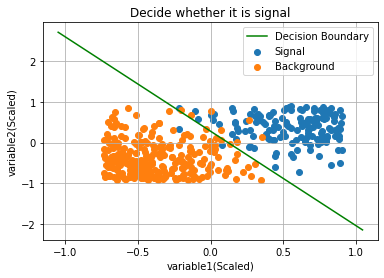

In [10]:
import matplotlib.pyplot as plt

plt.xlabel("variable1(Scaled)")
plt.ylabel("variable2(Scaled)")
plt.title('Decide whether it is signal')
x=np.arange(-1.05,1.05,0.005)
y = - theta[0][0]/theta[2][0] - theta[1][0]/theta[2][0]*x
plt.plot(x,y,label='Decision Boundary',color='green')
plt.scatter(yes_x,yes_y,label='Signal')
plt.scatter(no_x,no_y,label='Background')
plt.grid("True")
plt.legend()
plt.show()

**Conclusion: Even though we find some outliners in the graph, the decision boundary separate the signal and background data quite well.**

## Question 3 

### 3a)

The straight line is 
$$2x+3y-1=0$$

- Normal Vector (Column vector): $$ (2,3)^{t} $$
- Distance to origin:$$\frac{|-1|}{\sqrt{2^{2}+3^2}} = \frac{1}{\sqrt{13}}$$
- Distance to an abitrary point (x1,y1): $$\frac{|2 \times x_1 + 3 \times y_1 - 1|}{\sqrt{2^{2}+3^2}} = \frac{|2x + 3y - 1|}{\sqrt{13}} $$


## 3b)

There are 2 main things that we can change in this part, 
1.  **Regularization parameter (reg)** 
2.  **Mutiplers**

In [1]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt 
import numpy as np 

!git clone https://github.com/XiaoxueRan/hku_phys3151_2022

Cloning into 'hku_phys3151_2022'...
remote: Enumerating objects: 96, done.
remote: Counting objects: 100% (96/96), done.
remote: Compressing objects: 100% (92/92), done.
remote: Total 96 (delta 39), reused 33 (delta 4), pack-reused 0
Unpacking objects: 100% (96/96), done.


In [2]:
#Preparation of data
X=np.zeros([200,2])
y=np.zeros(200)
for i in range(0,100):
    rx=500*(np.random.rand())+100
    X[i][0]=rx
    ry=500-rx+(np.random.rand())*2000
    X[i][1]=ry
    y[i]=1
for i in range(100,200):
    rx=-500*(np.random.rand())-100
    X[i][0]=rx
    ry=-(500-rx+(np.random.rand())*2000)
    X[i][1]=ry
    y[i]=-1

In [3]:
#Feature scaling
from sklearn import preprocessing
scaler = preprocessing.RobustScaler()
X_scaled = scaler.fit_transform(X)
#X_scaled = pd.DataFrame(X_scaled,columns=list(X.columns.values))
X=X_scaled
y = y.reshape((len(y),1))
X_b = np.c_[np.ones((len(X),1)),X]
n=X_b.shape[1]
theta = np.random.random((n,1))

In [14]:
# Define the function 

def hinge(X,y,theta):                        #for maximum-margin classification
    pred = 1 - np.multiply(y,(X.dot(theta)))
    loss = np.maximum(np.zeros(pred.shape),pred)
    hinge = np.sum(loss)
    return hinge

def computeCost(X,y,theta,reg=0):
    m = float(len(y))
    theta2 = np.square(theta)
    reg =0
    cost = (reg/(2*m)) * np.sum(theta2) + (1/m) * hinge(X,y,theta)
    return cost

def check(X,y,theta):
    X_b = np.c_[np.ones((len(X),1)),X]
    
    fx = np.multiply(y,(X_b.dot(theta)))
    
    check = np.less(fx,np.ones(fx.shape))
    
    check = np.where(check==True,1,0)
    
    return check

def subgradient_descent(X,y,theta,iterations=1000,reg2=1):
    m = float(y.shape[0])
    
    X_b = np.c_[np.ones((len(X),1)),X]
    
    cost_history = np.zeros(iterations)
    
    theta_history = np.zeros((iterations,X_b.shape[1]))
    
    for it in range(iterations):
        alpha = 1/(reg2*(it+1))
        theta = theta + alpha*((np.multiply(check(X,y,theta),y)).T.dot(X_b)).T
        theta[1:] = theta[1:] - alpha*reg2*theta[1:]
        theta_history[it,:] = theta.T
        cost_history[it]  = computeCost(X_b,y,theta,reg)
        
    return theta, cost_history, theta_history

Here, we can see how the different reg can lead to different result. 

In [15]:
# Implementation
reg = [10**(-3),1,100]                                   # Larger reg, poorer performance                             
n_iter = 100000
theta,cost_history,theta_history = subgradient_descent(X,y,theta,n_iter,reg[0])

In [17]:
theta1,cost_history,theta_history = subgradient_descent(X,y,theta,n_iter,reg[1])
theta2,cost_history,theta_history = subgradient_descent(X,y,theta,n_iter,reg[2])

#Separate the data into 2 groups
#y=1 admitted(yes)
yes_x=[]
yes_y=[]
#y=0 not admitted(no)
no_x=[]
no_y=[]

for i in range(0,len(y)):
    if y[i]== -1:
        no_x.append(X_b[i][1])
        no_y.append(X_b[i][2])
    else:
        yes_x.append(X_b[i][1])
        yes_y.append(X_b[i][2])

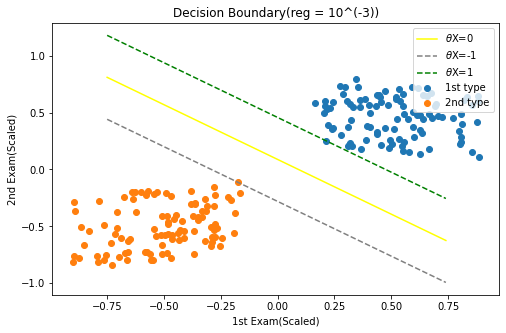

In [18]:
# Ploting the decision boundary reg = 10^(-3)

plt.figure(figsize=(8,5))
plt.xlabel('1st Exam(Scaled)')
plt.ylabel('2nd Exam(Scaled)')
plt.title('Decision Boundary(reg = 10^(-3))')
x=np.arange(-0.75,0.75,0.01)
y1=(-theta[1]/theta[2])*x+(-theta[0]/theta[2])#=0
y2=(-theta[1]/theta[2])*x+((-theta[0]-1)/theta[2])#=-1
y3=(-theta[1]/theta[2])*x+((-theta[0]+1)/theta[2])#=1
plt.plot(x,y1,label=r'$\theta$X=0',color='yellow' )
plt.plot(x,y2,label=r'$\theta$X=-1',linestyle='--',color='gray' )
plt.plot(x,y3,label=r'$\theta$X=1',linestyle='--' ,color='green')
plt.scatter(yes_x,yes_y,label='1st type')
plt.scatter(no_x,no_y,label='2nd type')
plt.legend()
plt.show()


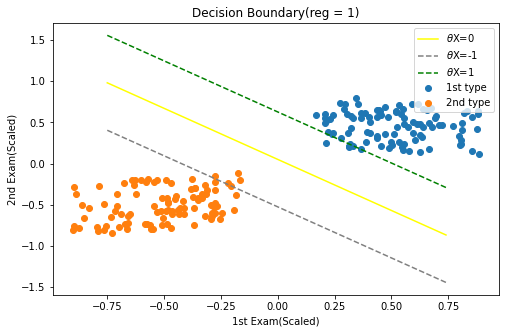

In [7]:
# Ploting the decision boundary reg = 1

plt.figure(figsize=(8,5))
plt.xlabel('1st Exam(Scaled)')
plt.ylabel('2nd Exam(Scaled)')
plt.title('Decision Boundary(reg = 1)')
x=np.arange(-0.75,0.75,0.01)
y1=(-theta1[1]/theta1[2])*x+(-theta1[0]/theta1[2])#=0
y2=(-theta1[1]/theta1[2])*x+((-theta1[0]-1)/theta1[2])#=-1
y3=(-theta1[1]/theta1[2])*x+((-theta1[0]+1)/theta1[2])#=1
plt.plot(x,y1,label=r'$\theta$X=0',color='yellow' )
plt.plot(x,y2,label=r'$\theta$X=-1',linestyle='--',color='gray' )
plt.plot(x,y3,label=r'$\theta$X=1',linestyle='--' ,color='green')
plt.scatter(yes_x,yes_y,label='1st type')
plt.scatter(no_x,no_y,label='2nd type')
plt.legend()
plt.show()

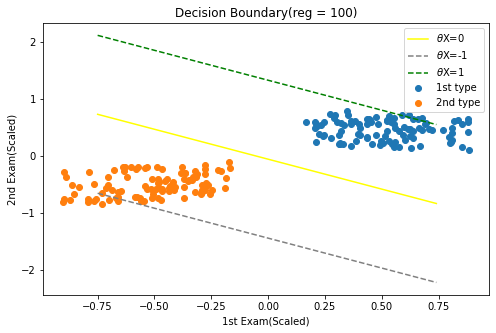

In [8]:
# Ploting the decision boundary reg = 100

plt.figure(figsize=(8,5))
plt.xlabel('1st Exam(Scaled)')
plt.ylabel('2nd Exam(Scaled)')
plt.title('Decision Boundary(reg = 100)')
x=np.arange(-0.75,0.75,0.01)
y1=(-theta2[1]/theta2[2])*x+(-theta2[0]/theta2[2])#=0
y2=(-theta2[1]/theta2[2])*x+((-theta2[0]-1)/theta2[2])#=-1
y3=(-theta2[1]/theta2[2])*x+((-theta2[0]+1)/theta2[2])#=1
plt.plot(x,y1,label=r'$\theta$X=0',color='yellow' )
plt.plot(x,y2,label=r'$\theta$X=-1',linestyle='--',color='gray' )
plt.plot(x,y3,label=r'$\theta$X=1',linestyle='--' ,color='green')
plt.scatter(yes_x,yes_y,label='1st type')
plt.scatter(no_x,no_y,label='2nd type')
plt.legend()
plt.show()

**Conclusion: Larger reg, poorer performance**

As the cost function is $$J(\omega, c ,\lambda) = \frac{\lambda}{2m}||\omega||^{2} + \frac{1}{m}\sum_{i=1}^{m}max(0,1-y_{i}(\vec{\omega} \cdot \vec{x_i}+b))$$ 

The regularization parameter here is λ. By minimizing the cost function here, we can a set of approporiate hyperplane. Therefore, in order to minimize, we have to decrease the value of \lambda as much as possible. 

However, if we set the λ too small, the alpha (i.e. `alpha = 1/(reg2*(it+1))`) inside the `subgradient_descent function` would become too large and make the gradient steps become too large too. Therefore, we should also avoid the situation like this. 

Then,we investigate how can the mutiplers be set to obtain a better result 

In [ ]:
multiplier=[1.05,1.15,2]        # This one has to be searched too                    
theta1=theta*multiplier[0]

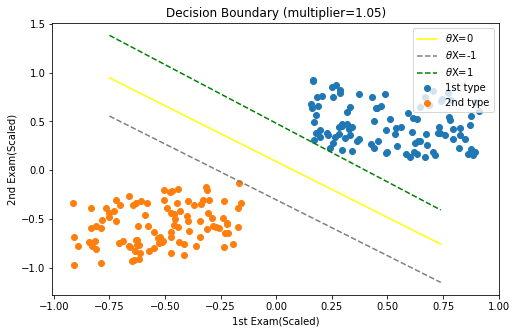

In [ ]:
plt.figure(figsize=(8,5))
plt.xlabel('1st Exam(Scaled)')
plt.ylabel('2nd Exam(Scaled)')
plt.title('Decision Boundary (multiplier=1.05)')
x=np.arange(-0.75,0.75,0.01)
y1=(-theta1[1]/theta1[2])*x+(-theta1[0]/theta1[2])#=0
y2=(-theta1[1]/theta1[2])*x+((-theta1[0]-1)/theta1[2])#=-1
y3=(-theta1[1]/theta[2])*x+((-theta1[0]+1)/theta1[2])#=1
plt.plot(x,y1,label=r'$\theta$X=0',color='yellow' )
plt.plot(x,y2,label=r'$\theta$X=-1',linestyle='--',color='gray' )
plt.plot(x,y3,label=r'$\theta$X=1',linestyle='--' ,color='green')
plt.scatter(yes_x,yes_y,label='1st type')
plt.scatter(no_x,no_y,label='2nd type')
plt.legend()

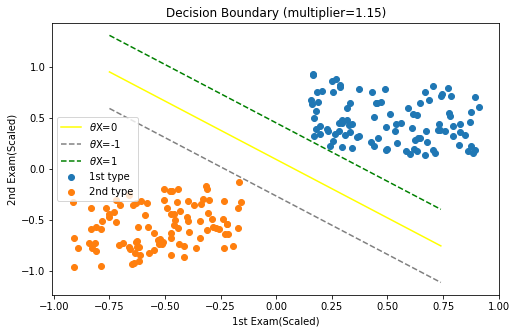

In [ ]:
theta2=theta*multiplier[1]

plt.figure(figsize=(8,5))
plt.xlabel('1st Exam(Scaled)')
plt.ylabel('2nd Exam(Scaled)')
plt.title('Decision Boundary (multiplier=1.15)')
x=np.arange(-0.75,0.75,0.01)
y1=(-theta2[1]/theta2[2])*x+(-theta2[0]/theta2[2])#=0
y2=(-theta2[1]/theta2[2])*x+((-theta2[0]-1)/theta2[2])#=-1
y3=(-theta2[1]/theta2[2])*x+((-theta2[0]+1)/theta2[2])#=1
plt.plot(x,y1,label=r'$\theta$X=0',color='yellow' )
plt.plot(x,y2,label=r'$\theta$X=-1',linestyle='--',color='gray' )
plt.plot(x,y3,label=r'$\theta$X=1',linestyle='--' ,color='green')
plt.scatter(yes_x,yes_y,label='1st type')
plt.scatter(no_x,no_y,label='2nd type')
plt.legend()

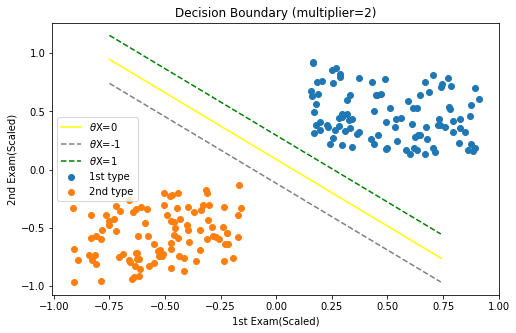

In [ ]:
theta3=theta*multiplier[2]

plt.figure(figsize=(8,5))
plt.xlabel('1st Exam(Scaled)')
plt.ylabel('2nd Exam(Scaled)')
plt.title('Decision Boundary (multiplier=2)')
x=np.arange(-0.75,0.75,0.01)
y1=(-theta3[1]/theta3[2])*x+(-theta3[0]/theta3[2])#=0
y2=(-theta3[1]/theta3[2])*x+((-theta3[0]-1)/theta3[2])#=-1
y3=(-theta3[1]/theta3[2])*x+((-theta3[0]+1)/theta3[2])#=1
plt.plot(x,y1,label=r'$\theta$X=0',color='yellow' )
plt.plot(x,y2,label=r'$\theta$X=-1',linestyle='--',color='gray' )
plt.plot(x,y3,label=r'$\theta$X=1',linestyle='--' ,color='green')
plt.scatter(yes_x,yes_y,label='1st type')
plt.scatter(no_x,no_y,label='2nd type')
plt.legend()

Then we can see that the dataset is completly seperated by the margins.Among the three permeters, **1.15** seems to be the best 

The margin between 2 set of data can be change by mutliplying a constant to it. As the region between 2 set of data is described by $$ M = \frac{b}{||\omega||^{2}}$$, by multiplying a constant like β, the egion between 2 set of data is described by $$M = \frac{b}{\beta^{2}||\omega||^{2}}$$

Therefore, larger is the constant multipying to the theta, more the space between 2 data set will shrink. 

## 3c)

### Support Vector Machine

In [ ]:
# Import the data from github
!git clone https://github.com/XiaoxueRan/hku_phys3151_2022

fatal: destination path 'hku_phys3151_2022' already exists and is not an empty directory.


In [ ]:
#Prepare the data
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/hku_phys3151_2022/support-vector-machine/Iris.csv')
df = df.drop(['Id'],axis=1)

#As 51-100 is iris-veriscolor, we drop it first 
list1 = list(range(51,101))
k = df[(df.Species == "Iris-versicolor")].index               #Useful skills 
df = df.drop(k)


In [ ]:
#Set x to be PetalLengthCm, y to be PetalWidthCm
#Below first locate which rows contain needed speices, then select that rows
#and make it to a numpy array
x = df[['PetalLengthCm','Species']]
k1 = x[(x.Species == "Iris-setosa")].index
k2 = x[(x.Species == "Iris-virginica")].index

setosa_petal_length = x.loc[k1][['PetalLengthCm']].to_numpy()
virginica_petal_length = x.loc[k2][['PetalLengthCm']].to_numpy()


y = df[['PetalWidthCm','Species']]
y1 = y[(x.Species == "Iris-setosa")].index
y2 = y[(x.Species == "Iris-virginica")].index

setosa_petal_width = y.loc[y1][['PetalWidthCm']].to_numpy()
virginica_petal_width = y.loc[k2][['PetalWidthCm']].to_numpy()

#print(setosa_petal_width)
#print(virginica_petal_width)

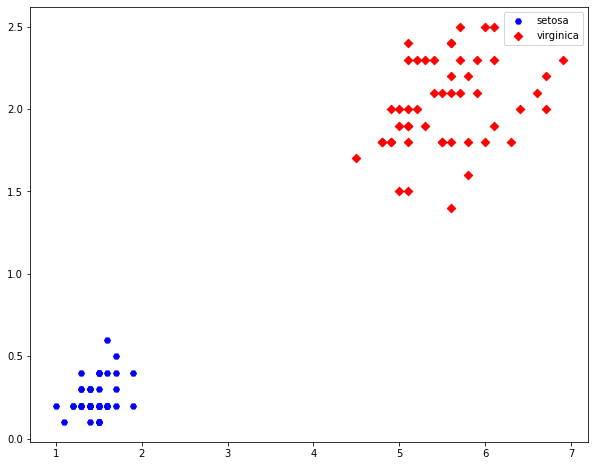

In [ ]:
#Prepare the scatter diagram
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
#Choose setosa to be blue, virginica to be red
plt.scatter(setosa_petal_length, setosa_petal_width, marker='H', color='blue', label = "setosa")
plt.scatter(virginica_petal_length, virginica_petal_width, marker='D', color='red', label = "virginica")
plt.legend()
plt.show()

In [ ]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import numpy as np

x_new = df[['PetalLengthCm','PetalWidthCm','Species']]
#Set setosa to be -1, Virginica to be 1
x_new.loc[x['Species']== "Iris-setosa",'Species'] = -1             #Important skills
x_new.loc[x['Species']== "Iris-virginica",'Species'] = 1

Y = x_new.drop(['PetalLengthCm','PetalWidthCm'],axis=1).to_numpy()
Y = Y.reshape(1,100)[0]
X = x_new.drop(['Species'],axis=1).values.tolist()

X, Y = shuffle(X, Y)

x_train = []
y_train = []
x_test = []
y_test = []

train_percent = 0.9
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=train_percent)

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

y_train = y_train.reshape(int(train_percent*100),1)
#Add 0.01 here to ensure it gets 10 
y_test = y_test.reshape(int((1-train_percent+0.01)*100),1)


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
#start the gradient descent

train_f1 = x_train[:,0]
train_f2 = x_train[:,1]

train_f0 = np.ones((90,1))
train_f1 = train_f1.reshape(90,1)
train_f2 = train_f2.reshape(90,1)

w1 = np.zeros((90,1))
w2 = np.zeros((90,1))
w0 = np.zeros((90,1))

epochs = 1
alpha = 0.01

while (epochs < 30000):
    y = w1 * train_f1 + w2 * train_f2 - w0
    prod = y * y_train
 #   print(epochs)
    count = 0
    for val in prod:   
    # P.17 of lecture slide 
        if (val >= 1):
            cost = 0
            w0 = w0
            w1 = w1 - alpha * ( 1/epochs * w1)
            w2 = w2 - alpha * ( 1/epochs * w2)
        else:
            cost = 1 - val
            w0 = w0 - alpha * (train_f0[count] * y_train[count])
            w1 = w1 - alpha * (1/epochs * w1 - train_f1[count] * y_train[count])
            w2 = w2 - alpha * (1/epochs * w2 - train_f2[count] * y_train[count])
        count += 1
    epochs += 1

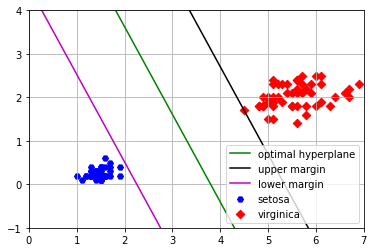

In [ ]:
#Plot the hyperplane and margins

plt.scatter(setosa_petal_length, setosa_petal_width, marker='H', color='blue', label = "setosa")
plt.scatter(virginica_petal_length, virginica_petal_width, marker='D', color='red', label = "virginica")
x = np.linspace(-1,7,100)
y = -(w1[-1]/w2[-1])*x + w0[-1]/w2[-1]
y1 = -(w1[-1]/w2[-1])*x + (1 + w0[-1])/w2[-1]
y2 = -(w1[-1]/w2[-1])*x + (-1 + w0[-1])/w2[-1]
plt.plot(x,y,label='optimal hyperplane', color = 'Green')
plt.plot(x,y1,label='upper margin', color = 'k')
plt.plot(x,y2,label='lower margin', color = 'm')
plt.xlim(0,7)
plt.ylim(-1,4)
plt.grid(True)
plt.legend()
plt.show()

### Logistic Regression

In [ ]:
def sigmoid(x):
    x=np.array(x,dtype=np.float64)
    return 1 / (1 + np.exp(-x))
  
def computeCost(theta,X,y):
    m = float(len(y))
    predictions = sigmoid(X.dot(theta))
    cost = -(1/m) * (y.T.dot(np.log(predictions))+(1-y).T.dot(np.log(1-predictions)))
    return cost


In [ ]:
def gradient_descent(X,y,theta,alpha=0.01,iterations=100):
    m = float(y.shape[0])
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,X.shape[1]))
    for it in range(iterations):
        
        prediction = sigmoid(X.dot(theta))
        theta = theta -(1/m)*alpha*(X.T.dot((prediction - y)))
        theta_history[it,:] = theta.T
        cost_history[it]  = computeCost(theta,X,y)
        
    return theta, cost_history, theta_history

In [ ]:
import numpy as np 

df = pd.read_csv('/content/hku_phys3151_2022/support-vector-machine/Iris.csv')
df = df.drop(['Id'],axis=1)

#As 51-100 is iris-veriscolor, we drop it first 
list1 = list(range(51,101))
k = df[(df.Species == "Iris-versicolor")].index               #Useful skills 
df = df.drop(k)


df_log = df[["PetalLengthCm","PetalWidthCm","Species"]]
df_log.loc[df_log['Species']== "Iris-setosa",'Species'] = 0
df_log.loc[df_log['Species']== "Iris-virginica",'Species'] = 1
print(df_log.head(100))

     PetalLengthCm  PetalWidthCm Species
0              1.4           0.2       0
1              1.4           0.2       0
2              1.3           0.2       0
3              1.5           0.2       0
4              1.4           0.2       0
..             ...           ...     ...
145            5.2           2.3       1
146            5.0           1.9       1
147            5.2           2.0       1
148            5.4           2.3       1
149            5.1           1.8       1

[100 rows x 3 columns]


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
#Feature scaling 

df_log = df_log.to_numpy()
X = df_log[:,0:-1]             #Contain all the data of [[PetalLengthCm,PetalWidthCm],...]
y = df_log[:,-1]    
y = y.reshape((len(y),1))       
n = X.shape[1]+1

# Use the sklearn module to do feature scaling 
from sklearn import preprocessing
scaler = preprocessing.RobustScaler()
X_scaled = scaler.fit_transform(X)

X = X_scaled    

X_b = np.c_[np.ones((len(X),1)),X]

theta = np.zeros((n,1))

In [ ]:
#Compute the theta 
alpha =0.1
n_iter =1000

theta,cost_history,theta_history = gradient_descent(X_b,y,theta,alpha,n_iter)
#print(theta)

In [ ]:
#y=1 "Iris-virginica"
yes_x=[]
yes_y=[]
#y=0 "Iris-setosa"
no_x=[]
no_y=[]
for i in range(0,100):
    if y[i]==0:
        no_x.append(X_b[i][1])
        no_y.append(X_b[i][2])
    else:
        yes_x.append(X_b[i][1])
        yes_y.append(X_b[i][2])

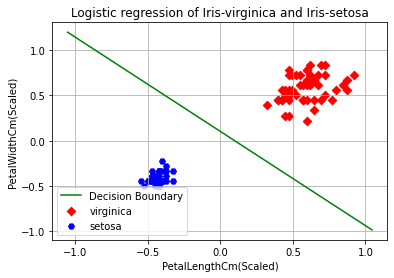

In [ ]:
#Plot the graph 
import matplotlib.pyplot as plt

plt.xlabel("PetalLengthCm(Scaled)")
plt.ylabel("PetalWidthCm(Scaled)")
plt.title('Logistic regression of Iris-virginica and Iris-setosa')
x=np.arange(-1.05,1.05,0.005)
y = - theta[0][0]/theta[2][0] - theta[1][0]/theta[2][0]*x
plt.plot(x,y,label='Decision Boundary',color='green')
plt.scatter(yes_x,yes_y,label="virginica",marker='D',color='red')
plt.scatter(no_x,no_y,label="setosa", marker='H',color='blue')
plt.grid("True")
plt.legend()
plt.show()